# Gráfico de caixa (*Boxplot*)

O gráfico *Boxplot* oferece um bom resumo dos dados, ajudando a compreender melhor a nossa distribuição.

Quando usar: Deve ser usado quando precisamos usar as informações estatísticas gerais sobre a distribuição dos dados. Ele pode ser usado para detectar *outliers* nos dados.

### Compreendendo o Boxplot


<img src="./img/boxplot2.png" width="400">


No diagrama acima, a linha que divide a caixa em 2 partes representa a mediana dos dados. 

O final da caixa mostra o quartil superior (75%) e o início da caixa representa o quartil inferior (25%). O quartil superior também é chamado de terceiro quartil e, da mesma forma, o quartil inferior também é chamado de primeiro quartil. 

A região entre o quartil inferior e o quartil superior é chamada de Intervalo Interquartil (IQR) e é usada para aproximar a propagação de 50% nos dados intermediários (75–25 = 50%). 

O *maximum* é o valor mais alto dos dados, da mesma forma, o *minimum* é o valor mais baixo (chamado de "caps"). 

Os pontos fora das caixas e entre o máximo e o máximo são chamados de *whiskers* (retas ou "fio do bigode"), eles mostram a faixa de valores nos dados. 

Os pontos extremos são *outliers* (valores atípicos), ou seja, se for menor que o quartil inferior-1,5 * IQR ou alto que o quartil superior + 1,5 * IQR.

### Importando bibliotecas e dados

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

exam_data = pd.read_csv('datasets/exams.csv')

In [2]:
exam_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some high school,free/reduced,none,69,61,58
1,female,group C,some college,free/reduced,completed,47,65,69
2,male,group A,high school,standard,none,66,52,53
3,male,group B,some college,standard,none,88,89,82
4,female,group C,master's degree,free/reduced,none,62,82,76


#### Extraindo apenas as pontuações do exame

In [3]:
exam_scores = exam_data[['math score', 'reading score', 'writing score']]
exam_scores.head()

,math score,reading score,writing score
0,69,61,58
1,47,65,69
2,66,52,53
3,88,89,82
4,62,82,76


In [4]:
exam_scores.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,67.150000,69.180000,67.780000
std,12.797865,13.832607,14.874954
min,36.000000,34.000000,33.000000
25%,56.000000,60.000000,57.750000
50%,68.000000,69.000000,68.500000
75%,76.000000,80.000000,77.250000
max,95.000000,99.000000,100.000000


In [5]:
# Para plotagem em boxplot, nós o convertemos em um array
exam_scores_array = np.array(exam_scores)
exam_scores_array

array([[ 69,  61,  58],
       [ 47,  65,  69],
       [ 66,  52,  53],
       [ 88,  89,  82],
       [ 62,  82,  76],
       [ 47,  69,  60],
       [ 71,  66,  74],
       [ 57,  62,  60],
       [ 60,  67,  65],
       [ 74,  72,  76],
       [ 77,  71,  67],
       [ 69,  79,  83],
       [ 65,  62,  56],
       [ 55,  58,  51],
       [ 78,  88,  91],
       [ 70,  72,  72],
       [ 55,  69,  55],
       [ 68,  68,  62],
       [ 73,  62,  58],
       [ 54,  50,  51],
       [ 81,  76,  77],
       [ 70,  76,  73],
       [ 64,  62,  63],
       [ 51,  66,  63],
       [ 49,  50,  43],
       [ 83,  80,  82],
       [ 86,  92,  81],
       [ 83,  89,  94],
       [ 61,  77,  68],
       [ 55,  50,  44],
       [ 56,  59,  55],
       [ 46,  57,  61],
       [ 68,  60,  52],
       [ 78,  75,  69],
       [ 85,  94,  93],
       [ 95,  99,  95],
       [ 82,  74,  78],
       [ 94,  85,  96],
       [ 64,  71,  68],
       [ 70,  80,  85],
       [ 84,  78,  84],
       [ 62,  81

###  Gerando o gráfico

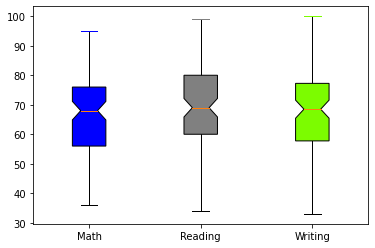

In [6]:
colors = ['blue', 'grey', 'lawngreen']

bp = plt.boxplot(exam_scores_array, 
                 patch_artist=True,
                 notch=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])
    
plt.xticks([1, 2, 3], ['Math', 'Reading', 'Writing'])

plt.show()

```bp``` contém os componentes do boxplot como caixas, retas ("fios de bigode"), medianas, "caps". 

OBS: Outra biblioteca de plotagem ("Seaborn") torna mais fácil construir plotagens personalizadas do que a "matplotlib".

```patch_artist``` torna a personalização possível. 

```notch``` faz com que a mediana pareça mais proeminente.

Uma advertência ao usar o boxplot é que o número de observações no valor único não está definido, o "Jitter Plot" do "Seaborn" ou o "Violinplot" podem superar isso.

### Violin Plots

Semelhante aos boxplots, mas mostram a densidade dos pontos de dados em torno de um determinado valor com suas larguras.

O gráfico de violino é um gráfico melhor do que o boxplot, pois dá uma compreensão muito mais ampla da distribuição. Assemelha-se a um violino e as áreas densas apontam para a maior distribuição de dados, de outra forma escondidos por boxplots

Quando usar: é uma extensão do boxplot, deve ser usado quando precisamos de um melhor entendimento intuitivo dos dados.

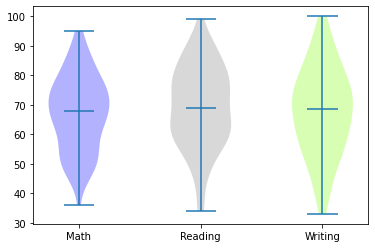

In [7]:
vp = plt.violinplot(exam_scores_array,
                    showmedians=True)

plt.xticks([1, 2, 3], ['Math', 'Reading', 'Writing'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])

plt.show()    

A densidade de pontos no meio se destacam mais, pois no nosso *dataset* os alunos tendem a pontuar geralmente em torno da média.

Fonte: Traduzido de [Data-visualization-using-matplotlib](https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70)